<a href="https://colab.research.google.com/github/juanxo90/geostats_curie/blob/main/notebooks/notebook1_exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Basic exploratory data analysis. 

During this steep we will do the exploratory data analisys for the Depth to the bottom of magnetic source, followin the same steeps mentioned in the paper.

## Install and import used libraries

In [1]:
%%capture
!pip install geopandas rtree pygeos

In [2]:
# Import numerical and processing libraries
import numpy as np
import pandas as pd

# Import libraries for data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Geospatial libraries and geospatial data viz
import geopandas as gpd
import folium
from folium import Circle, Marker, CircleMarker
from folium.plugins import HeatMap

# Import libraries for color ramp
import branca
import branca.colormap as cm

## Creating dataframe

It is important to say that only the Zb (depth to the bottom of magnetic source) will be analized

In [3]:
data_url = 'https://raw.githubusercontent.com/juanxo90/geostats_curie/main/data/data.dat'
data = pd.read_csv(data_url,
            skiprows = 12, header=None, sep='\t',
            names=['x', 'y', 'FP', 'Zt', 'Zo',
                     'Zb', 'Zt_err', 'Zo_err', 
                     'Zb_err', 'misfit'])

## Exploratory Data Analysis!

In [4]:
data.shape

(951, 10)

Aour data has 951 recods in 10 columns. We will analyze the columns and get only the one that we will need it!

In [5]:
# calculating descriptive statistics of the data
data.describe()

,x,y,FP,Zt,Zo,Zb,Zt_err,Zo_err,Zb_err,misfit
count,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000
mean,-103.784355,23.828350,3.158044,2.011725,9.463533,16.916940,0.181640,0.656688,1.563670,0.220762
std,8.927340,5.591130,0.693349,1.754452,4.085789,7.520698,0.103282,4.061679,0.993534,0.230552
min,-122.699049,12.298368,1.000000,0.170000,2.170000,3.200000,0.040000,0.000000,0.080000,0.062200
25%,-110.897072,19.495189,2.750000,0.660000,6.270000,10.510000,0.120000,0.240000,0.850000,0.153500
50%,-103.631560,24.072075,3.300000,1.490000,8.710000,15.730000,0.160000,0.380000,1.360000,0.195600
75%,-96.931682,28.570572,3.600000,2.780000,11.845000,21.535000,0.210000,0.600000,2.080000,0.251150
max,-85.762416,33.180273,4.000000,9.870000,23.890000,41.100000,0.810000,95.000000,7.290000,6.800400


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       951 non-null    float64
 1   y       951 non-null    float64
 2   FP      951 non-null    float64
 3   Zt      951 non-null    float64
 4   Zo      951 non-null    float64
 5   Zb      951 non-null    float64
 6   Zt_err  951 non-null    float64
 7   Zo_err  951 non-null    float64
 8   Zb_err  951 non-null    float64
 9   misfit  951 non-null    float64
dtypes: float64(10)
memory usage: 74.4 KB


From the ```.describe``` and ```.info``` we found that there is not null values and all the records are numerical data (float64).

Remember, we are only interested in Zb, for this reason, we will calculate the histogram, kurtosis and Skewness.
 

Text(30, 0.1, 'Skewness 0.642')

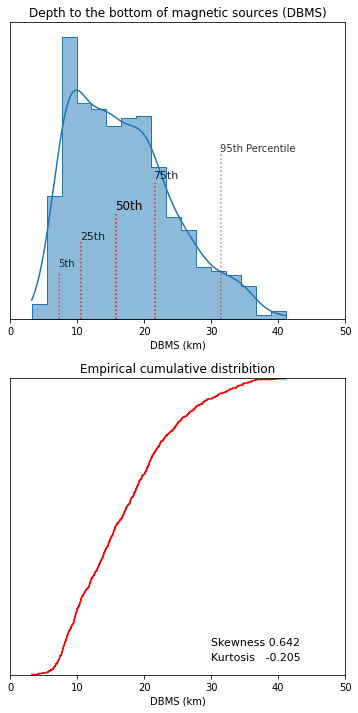

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(6, 12))

sns.histplot(data, x="Zb", kde=True, ax=axs[0], element="step", stat="density",)

quant_5, quant_25, quant_50, quant_75, quant_95 = \
data.Zb.quantile(0.05), data.Zb.quantile(0.25), \
data.Zb.quantile(0.5), data.Zb.quantile(0.75), data.Zb.quantile(0.95)

quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], 
          [quant_50, 1, 0.36], [quant_75, 0.8, 0.46], 
          [quant_95, 0.6, 0.56]]

for i in quants:
    axs[0].axvline(i[0], alpha = i[1], ymax = i[2], 
    linestyle = ":", color='red')

x_start, x_end = 0, 50
axs[0].set_xlim(x_start, x_end)
axs[0].set_xlabel("DBMS (km)")

axs[0].set_yticklabels([])
axs[0].set_ylabel("")

axs[0].text(quant_5-.01, 0.012, "5th", size = 10, alpha = 0.8)
axs[0].text(quant_25-.13, 0.018, "25th", size = 11, alpha = 0.85)
axs[0].text(quant_50-.13, 0.025, "50th", size = 12, alpha = 1)
axs[0].text(quant_75-.13, 0.032, "75th", size = 11, alpha = 0.85)
axs[0].text(quant_95-.25, 0.038, "95th Percentile", size = 10, alpha =.8)

axs[0].set_title("Depth to the bottom of magnetic sources (DBMS)")

axs[0].tick_params(left = False)


sns.ecdfplot(data, x="Zb", ax=axs[1], color='red')

axs[1].set_yticklabels([])
axs[1].set_ylabel("")

axs[1].set_xlim(x_start, x_end)
axs[1].set_xlabel("DBMS (km)")

axs[1].tick_params(left = False)
axs[1].set_title("Empirical cumulative distribition");


axs[1].text(30, 0.05, f"Kurtosis   {round(data.Zb.kurt(), 3)}", size = 11)
axs[1].text(30, 0.1, f"Skewness {round(data.Zb.skew(), 3)}", size = 11)

The distribution does not follow a normal distribution. That is, for a sequential gaussian simulation is necessary to perform a normal score tranformation.

## Creating maps

In [8]:
# creating a geopandas dataframe
gdf = gpd.GeoDataFrame(data[['x', 'y', 'Zb']],
                             geometry=gpd.points_from_xy(
                                 data.x,
                                 data.y
                             ),
                       crs='EPSG:4326')
#EPSG:6372 (kambert  conical)

In [9]:
# getting the mexico boundaries
url_edos = 'https://data.opendatasoft.com/explore/dataset/georef-mexico-state-millesime@public/download/?format=geojson&timezone=America/Mexico_City&lang=en'
states = gpd.read_file(url_edos)
states = states[states.year == '2019']

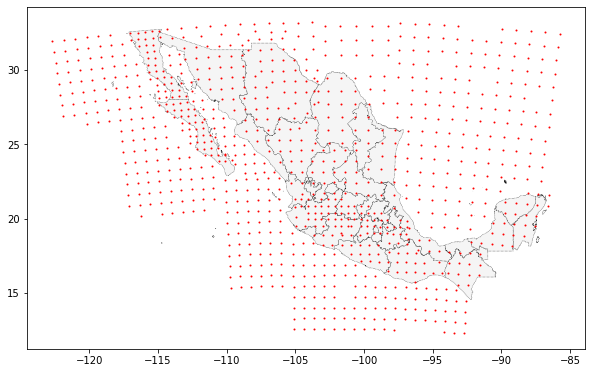

In [10]:
# and making a visualization
ax = states.plot(figsize=(10,10),
                  color='whitesmoke',
                  linestyle=':',
                  edgecolor='black',
                  linewidth=0.5)
gdf.plot(markersize=1, color='#FF0000', ax=ax)

As we can see, these is the distribution of the centroids where de depth to the bottom of magnetic sources (DBMS) was calculated.

From these data, before to make the data exploration, we can generate the interactive map to see the distribution and values for every DBMS.

In [11]:
# getting the centroids

x_center = gdf.centroid.x.mean()
y_center = gdf.centroid.y.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  after removing the cwd from sys.path.


In the paper, to making the maps the authors used this color ramp:

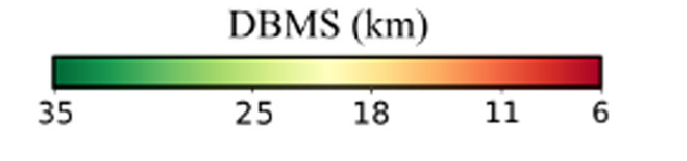

For this visualizaiton we will take only a general ramp of color

In [12]:
# creating a folium map

m = folium.Map(location=[y_center, x_center], 
                 tiles='cartodbpositron', 
                 zoom_start=4.5)

colormap = cm.LinearColormap(colors=['#ac0725', '#ef6040', '#fce794', 
                                     '#c5e67e','#01723c'],
                             index=[6, 11, 18, 25, 35], 
                             vmin=gdf.Zb.min(),vmax=gdf.Zb.max(),
                             caption='DBMS (km)')

fg = folium.FeatureGroup()

for idx, row in gdf.iterrows():

    color = colormap(row.Zb)
    fg.add_child(Circle(location=[row.y, row.x],
                        radius=2,
                        fill=True,
                        color=color,
                        fill_color=color,
                        popup=row.Zb))
m.add_child(fg)
m.add_child(colormap)

m